# Prediction of student's graduation

The goal of this project - define students who need help to pass the exams (students who are failing). Build the predictives models based on sample data, which helps to find students with problems in their studies. Сompare the performance of different algorithms.

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data loading and exploration

1. Save data in *students* variable 

In [2]:
students = pd.read_csv("student-data.csv")

In [3]:
students.shape

(395, 31)

In [4]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


How we can see, there are 2 types of variables: numerical and categorical. 
Firstly, consider numerical variables and their main statistics, then - categorical:

In [5]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [6]:
categorical = students.dtypes[students.dtypes == "object"].index
print(categorical)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'passed'],
      dtype='object')


In [7]:
students[categorical].describe()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,passed
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no,yes
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263,265


There are no missing values in the data, all 395 values are filled.

Build graphs of the distribution of data on numerical variables:

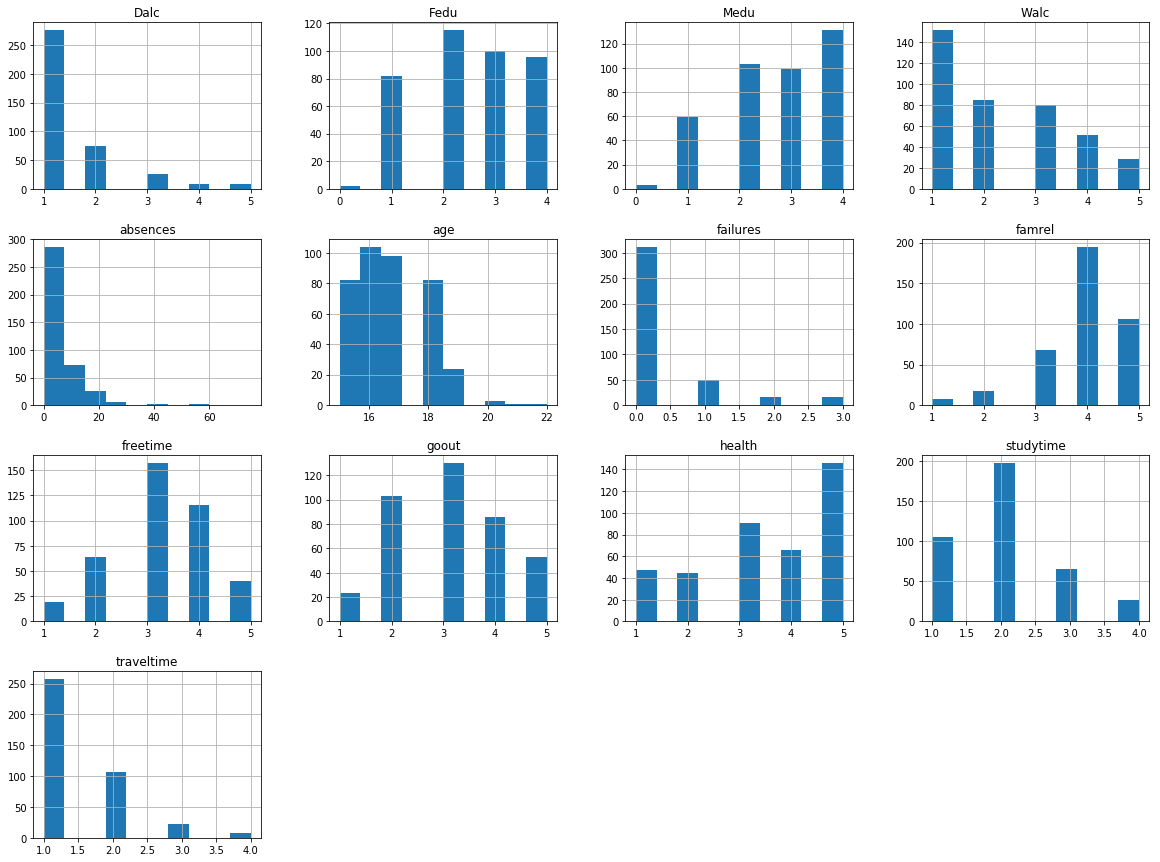

In [8]:
students.hist(figsize=(20,15))
plt.show()

2. Define the following basic value: level of passed students

In [9]:
level_grad = round(len(students[students.passed == 'yes']) / len(students.passed), 2)
level_grad

0.67

We can see that in our sample 2/3 of the students successfully pass, and 1/3 of the students are failed final exams. 
Calculate some dependances of label on predictors.

3. Dependency between 'age' and 'passed'

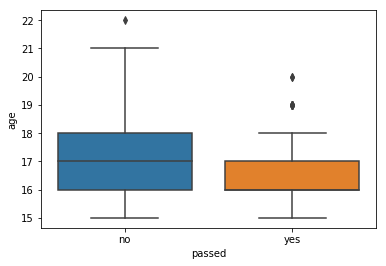

In [10]:
df = students.loc[:, ("age", "passed")]
sns.boxplot(x="passed", y="age", data=students)

4. Age, graduation and sex

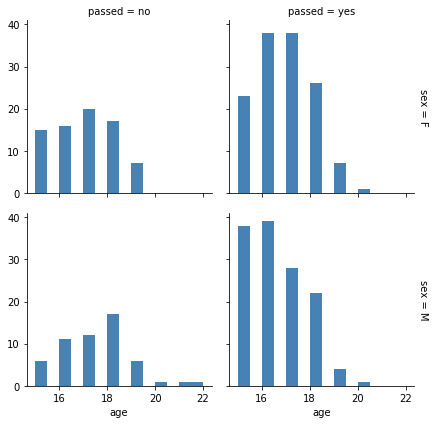

In [11]:
df = students.loc[:, ("age", "sex", "passed")]
g = sns.FacetGrid(df, row="sex", col="passed", margin_titles=True)
bins = np.linspace(15, 22, 15)
g.map(plt.hist, "age", color="steelblue", bins=bins)

5. 'Absences' and 'passed'

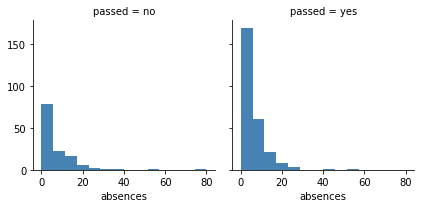

In [12]:
df = students.loc[:, ("absences", "passed")]
g = sns.FacetGrid(df, col="passed", margin_titles=True)
bins = np.linspace(0, 80, 15)
g.map(plt.hist, "absences", color="steelblue", bins=bins)

## Preparation of data

As we saw earlier, there are numeric variables and categorical ones in the data. To use predictive models, we need to tranforme all categorical variables into numerical ones.

In [13]:
students.school = students.school.map({"GP" : 0, "MS" : 1})
students.sex = students.sex.map({"F" : 0, "M" : 1})
students.passed = students.passed.map({"no" : 0, "yes" : 1})
students.romantic = students.romantic.map({"no" : 0, "yes" : 1})
students.internet = students.internet.map({"no" : 0, "yes" : 1})
students.higher = students.higher.map({"no" : 0, "yes" : 1})
students.nursery = students.nursery.map({"no" : 0, "yes" : 1})
students.activities = students.activities.map({"no" : 0, "yes" : 1})
students.paid = students.paid.map({"no" : 0, "yes" : 1})
students.famsup = students.famsup.map({"no" : 0, "yes" : 1})
students.schoolsup = students.schoolsup.map({"no" : 0, "yes" : 1})
students.guardian = students.guardian.map({"mother" : 1, "father" : 2, "other" : 3})
students.reason = students.reason.map({"home" : 1, "reputation" : 2, "course" : 3, "other": 4})
students.address = students.address.map({"U" : 0, "R" : 1})
students.famsize = students.famsize.map({"LE3" : 0, "GT3" : 1})
students.Pstatus = students.Pstatus.map({"T" : 0, "A" : 1})
students.Mjob = students.Mjob.map({"teacher" : 1, "health" : 1, "services" : 2, "at_home" : 3, "other" : 4})
students.Fjob = students.Fjob.map({"teacher" : 1, "health" : 1, "services" : 2, "at_home" : 3, "other" : 4})
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,0,18,0,1,1,4,4,3,1,...,0,0,4,3,4,1,1,3,6,0
1,0,0,17,0,1,0,1,1,3,4,...,1,0,5,3,3,1,1,3,4,0
2,0,0,15,0,0,0,1,1,3,4,...,1,0,4,3,2,2,3,3,10,1
3,0,0,15,0,1,0,4,2,1,2,...,1,1,3,2,2,1,1,5,2,1
4,0,0,16,0,1,0,3,3,4,4,...,0,0,4,3,2,1,2,5,4,1


It is useful to see the correlation between variables.

In [14]:
students.corr().round(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
school,1.00,-0.01,0.38,0.28,-0.06,-0.05,-0.13,-0.08,0.07,-0.02,...,-0.13,0.06,-0.05,0.03,-0.01,0.11,0.07,-0.04,-0.09,-0.03
sex,-0.01,1.00,-0.03,0.03,-0.09,-0.02,0.08,0.03,-0.09,0.01,...,0.04,-0.10,0.06,0.24,0.08,0.27,0.27,0.14,-0.07,0.07
age,0.38,-0.03,1.00,0.15,-0.04,-0.03,-0.16,-0.16,0.09,0.06,...,-0.11,0.16,0.05,0.02,0.13,0.13,0.12,-0.06,0.18,-0.18
address,0.28,0.03,0.15,1.00,0.07,-0.04,-0.14,-0.07,0.11,0.06,...,-0.22,-0.01,-0.01,-0.03,-0.07,0.09,0.10,0.04,0.03,-0.05
famsize,-0.06,-0.09,-0.04,0.07,1.00,-0.15,0.04,0.06,0.08,-0.04,...,-0.00,-0.03,0.02,-0.02,-0.02,-0.10,-0.10,0.03,-0.04,-0.04
Pstatus,-0.05,-0.02,-0.03,-0.04,-0.15,1.00,0.12,0.09,0.01,-0.01,...,-0.07,0.04,-0.03,-0.04,-0.00,0.03,-0.01,-0.02,0.13,0.04
Medu,-0.13,0.08,-0.16,-0.14,0.04,0.12,1.00,0.62,-0.50,-0.18,...,0.20,0.04,-0.00,0.03,0.06,0.02,-0.05,-0.05,0.10,0.12
Fedu,-0.08,0.03,-0.16,-0.07,0.06,0.09,0.62,1.00,-0.32,-0.34,...,0.13,0.02,-0.00,-0.01,0.04,0.00,-0.01,0.01,0.02,0.11
Mjob,0.07,-0.09,0.09,0.11,0.08,0.01,-0.50,-0.32,1.00,0.31,...,-0.17,0.05,0.03,-0.06,-0.02,0.01,-0.02,-0.06,0.03,-0.09
Fjob,-0.02,0.01,0.06,0.06,-0.04,-0.01,-0.18,-0.34,0.31,1.00,...,-0.04,-0.05,0.02,0.06,0.04,-0.06,0.05,-0.02,0.02,0.00


## Models, fitting and testing

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [16]:
X = students.loc[:, : "absences"]
y = students.passed

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.8, random_state=42)

Create classifiers with default parameters

In [17]:
dt_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state=42)
lr_clf = LogisticRegression(random_state=42)
svm_clf = SVC(random_state=42)

Fit them and see the performance metric

In [18]:
for clf in (dt_clf, knn_clf, rf_clf, lr_clf, svm_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.6075949367088608
KNeighborsClassifier 0.6455696202531646
RandomForestClassifier 0.7088607594936709
LogisticRegression 0.7341772151898734
SVC 0.6835443037974683


Evaluate metrics using cross validation

In [19]:
from sklearn.model_selection import cross_val_score

for clf in (dt_clf, knn_clf, rf_clf, lr_clf, svm_clf):
    score = cross_val_score(clf, X_scaled, y, cv = 5)
    print(clf.__class__.__name__, 'mean = ',round(np.mean(score), 3), 'sd = ', round(np.std(score), 3))

DecisionTreeClassifier mean =  0.628 sd =  0.066
KNeighborsClassifier mean =  0.671 sd =  0.032
RandomForestClassifier mean =  0.625 sd =  0.046
LogisticRegression mean =  0.676 sd =  0.041
SVC mean =  0.701 sd =  0.041


For each classifier we will try to select parameters in order to improve the quality metric

In [22]:
from sklearn.model_selection import GridSearchCV

tree_params = {'max_depth': range(1,11), 'max_features': range(1,30)}
knn_params = {'n_neighbors': range(1, 15)}
forest_params = {'max_depth': range(1,11),
    'max_features': range(4,19), 'n_estimators': [100, 150, 200, 300]}
svm_params = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

tree_grid = GridSearchCV(dt_clf, tree_params, cv=5, verbose=True)
knn_grid = GridSearchCV(knn_clf, knn_params, cv=5, verbose=True)
forest_grid = GridSearchCV(rf_clf, forest_params, cv=5, verbose=True)
svm_grid = GridSearchCV(svm_clf, svm_params, cv=5, verbose=True)

In [23]:
classifaers = ['Decision Tree:', "Knn:", 'Random Forest:', "SVM:"]
i = 0
for clf in (tree_grid, knn_grid, forest_grid, svm_grid):
    clf.fit(X_train, y_train)
    score = accuracy_score(y_test, clf.predict(X_test))
    print(classifaers[i], score)
    i+=1

Fitting 5 folds for each of 290 candidates, totalling 1450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1450 out of 1450 | elapsed:    4.5s finished
/Users/luda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Decision Tree: 0.6455696202531646
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    1.4s finished
/Users/luda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Knn: 0.6455696202531646
Fitting 5 folds for each of 600 candidates, totalling 3000 fits


[Parallel(n_jobs=1)]: Done 3000 out of 3000 | elapsed: 11.5min finished
/Users/luda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Random Forest: 0.6962025316455697
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


SVM: 0.6835443037974683


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.7s finished
/Users/luda/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [33]:
from sklearn.metrics import confusion_matrix
y_pred = pd.Series(forest_grid.predict(X_test), name='Predicted')
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,1,4,5
1,3,15,18
All,4,19,23


All considered models give approximately the same results. 
Predictions with the highest accuracy show Random Forest and SVM.
Also, as the initial sample was unbalanced (2/3 success, 1/3 - failure), the model often predicts a success.